In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Loading the Dataset 

In [27]:
df = pd.read_csv('/Users/anand/Desktop/Machine Learning/List_of_DataSet/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [28]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930

In [29]:
print("Missing Value \n",df.isnull().sum()) # No missing values
print("Duplicate values",df.duplicated().sum()) # No duplicate values

Missing Value 
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
Duplicate values 0


In [30]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [35]:
# Drop the UDI column as it is not useful for analysis
df.drop(columns=['UDI'], inplace=True)
# Convert the 'Product ID' column to a categorical type

In [36]:
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Get discrete (categorical) features
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("🔹 Continuous Features:")
print(continuous_features)

print("\n🔸 Categorical (Discrete) Features:")
print(categorical_features)

🔹 Continuous Features:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

🔸 Categorical (Discrete) Features:
['Product ID', 'Type', 'Failure Type']


In [37]:
# Custom threshold for considering a numeric column as discrete
discrete_from_numeric = [col for col in continuous_features if df[col].nunique() < 10]

# Remove these from continuous, add to discrete
continuous_features = [col for col in continuous_features if col not in discrete_from_numeric]
categorical_features.extend(discrete_from_numeric)


In [38]:
print(categorical_features)
print(continuous_features)
print("Total number of features:", len(df.columns))


['Product ID', 'Type', 'Failure Type', 'Target']
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
Total number of features: 9


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


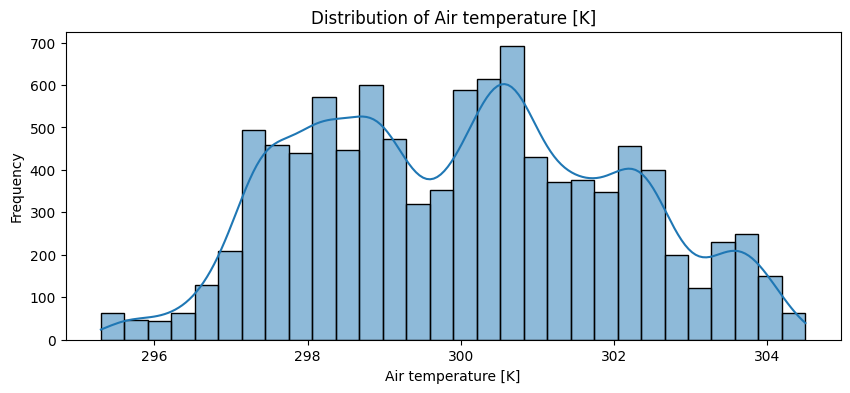

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


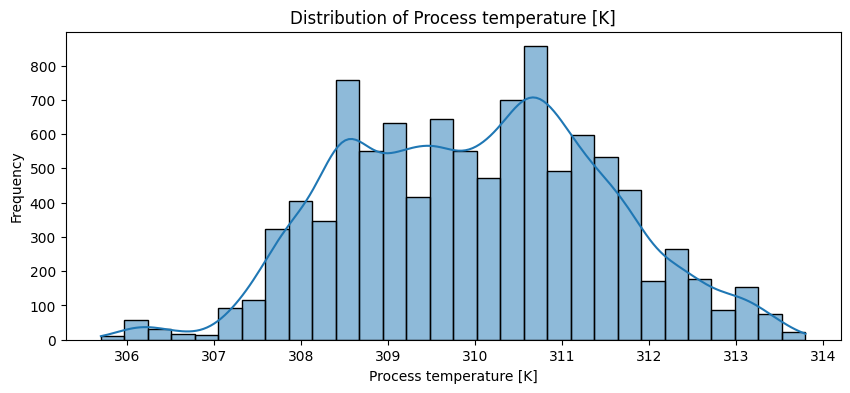

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


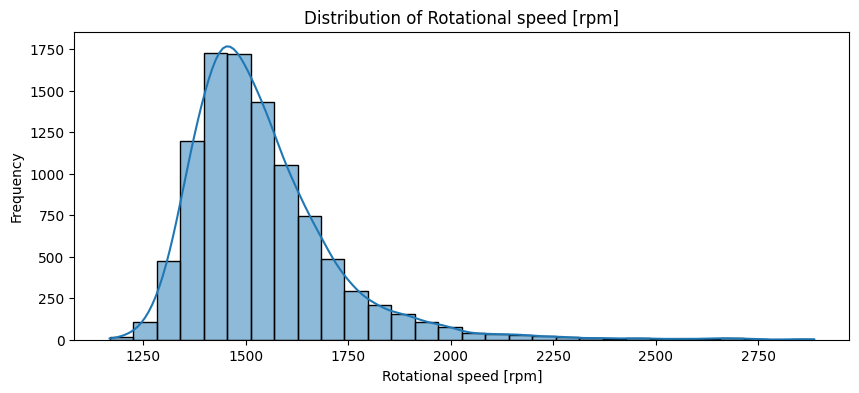

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


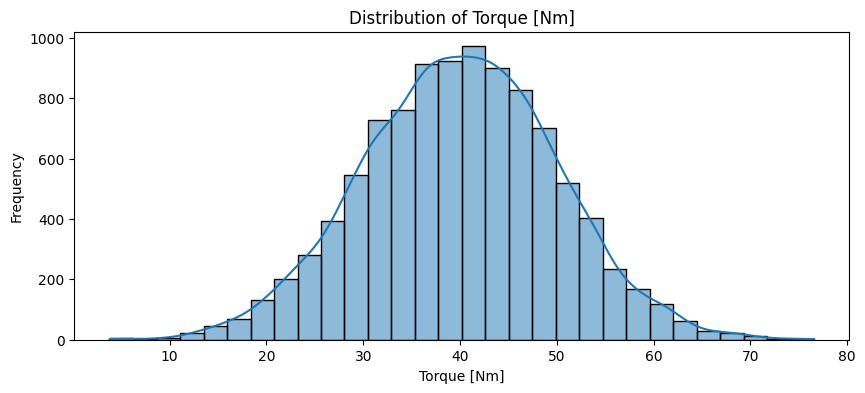

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


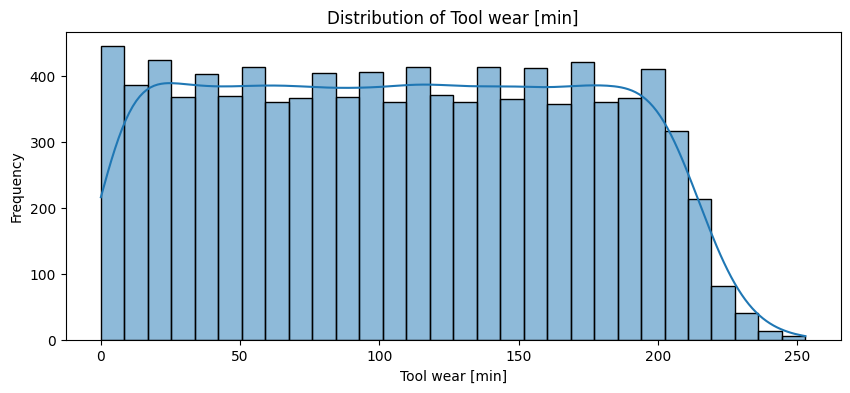

In [39]:
# Plot distribution of continuous features
for feature in continuous_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

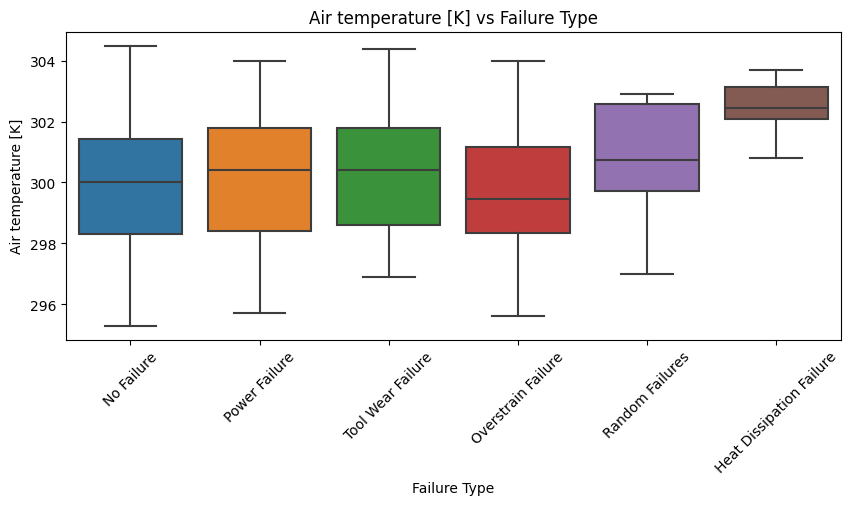

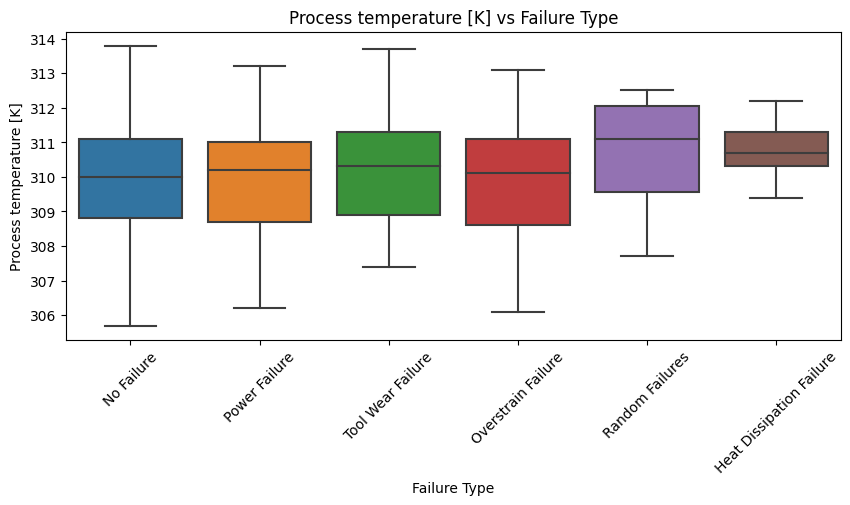

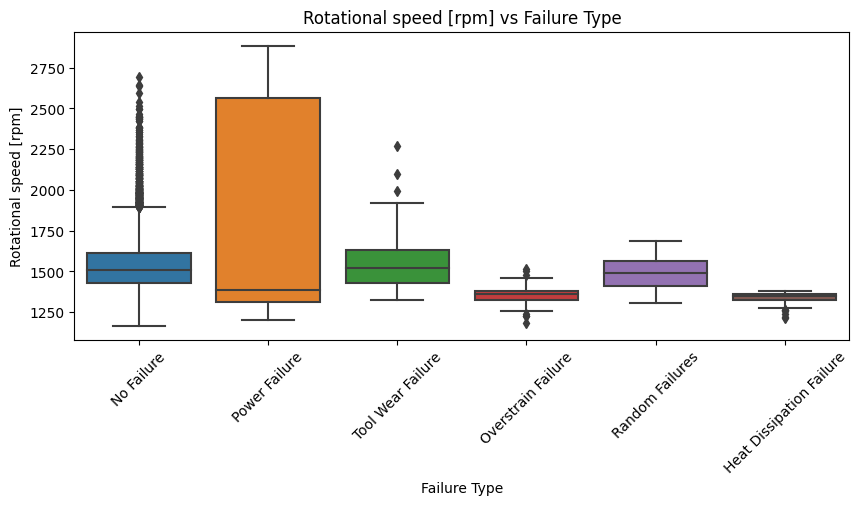

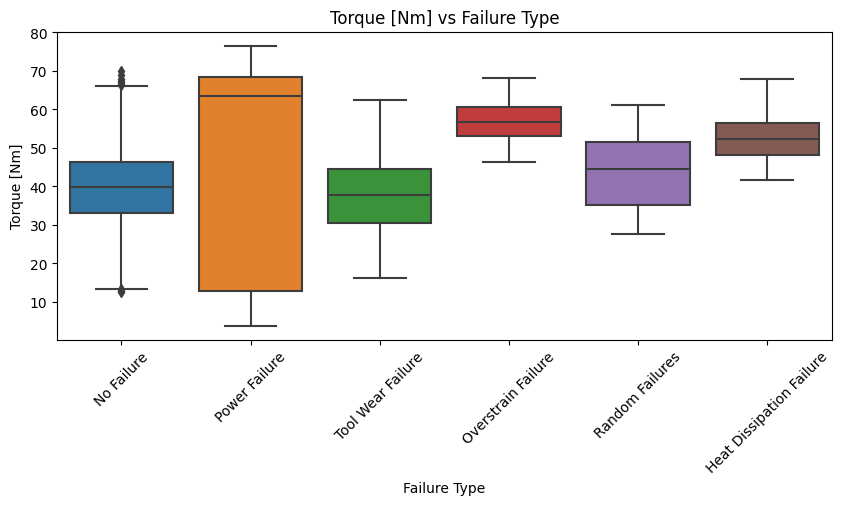

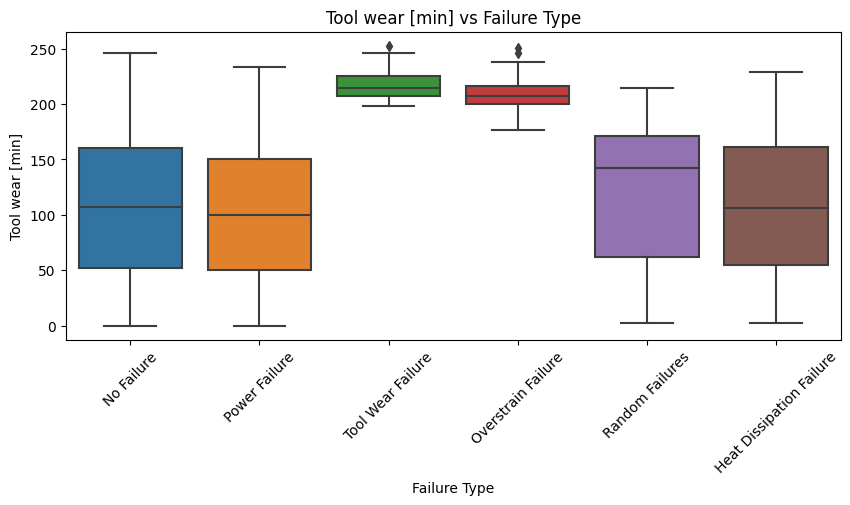

In [41]:
# plot the continuous features against the target variable Failure Type
for feature in continuous_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Failure Type', y=feature, data=df)
    plt.title(f'{feature} vs Failure Type')
    plt.xlabel('Failure Type')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

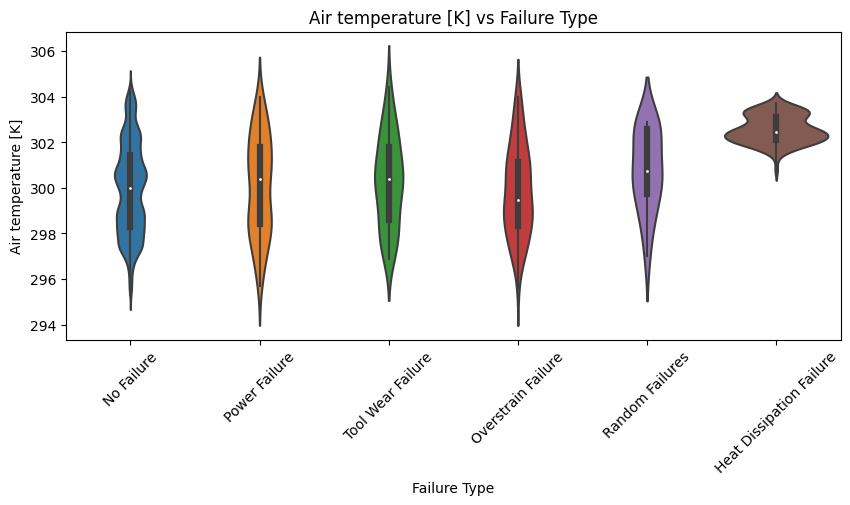

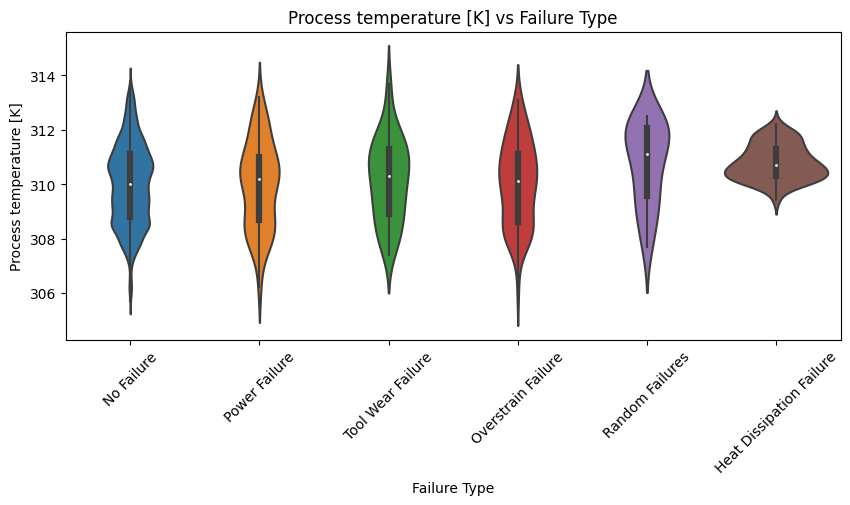

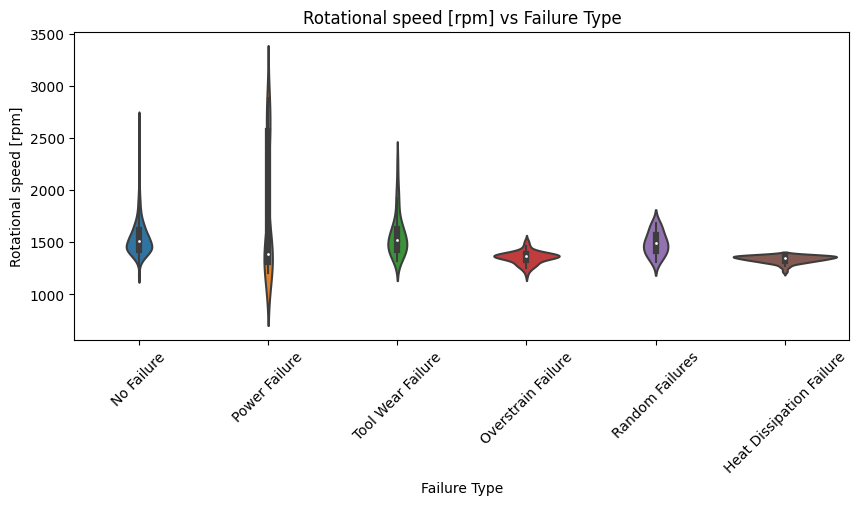

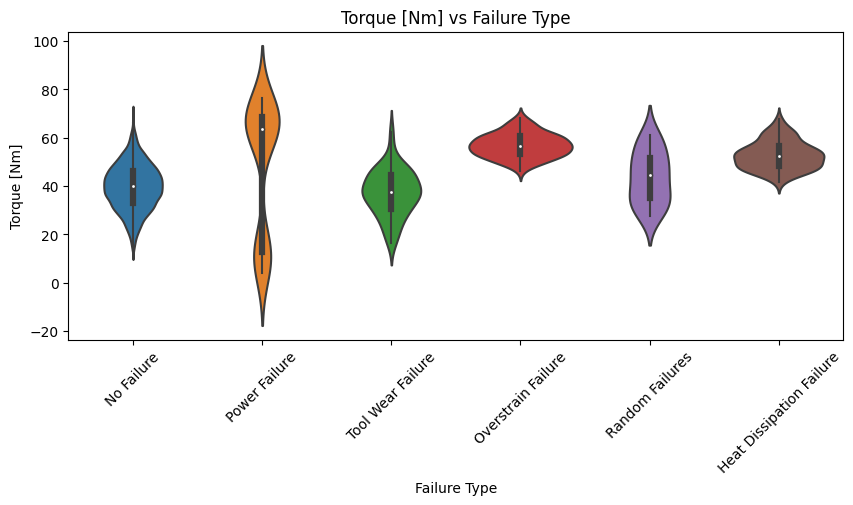

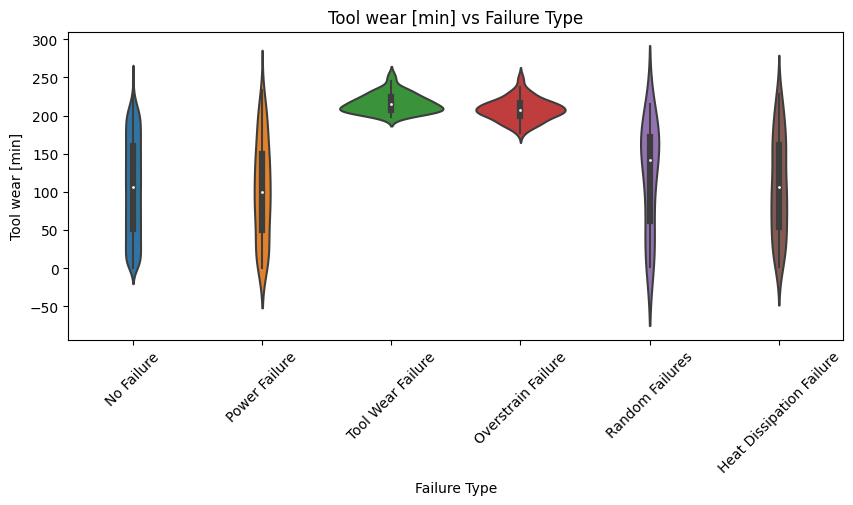

In [42]:
# use some other plots to visualize the relationship between continuous features and the target variable
for feature in continuous_features:
    plt.figure(figsize=(10, 4))
    sns.violinplot(x='Failure Type', y=feature, data=df)
    plt.title(f'{feature} vs Failure Type')
    plt.xlabel('Failure Type')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

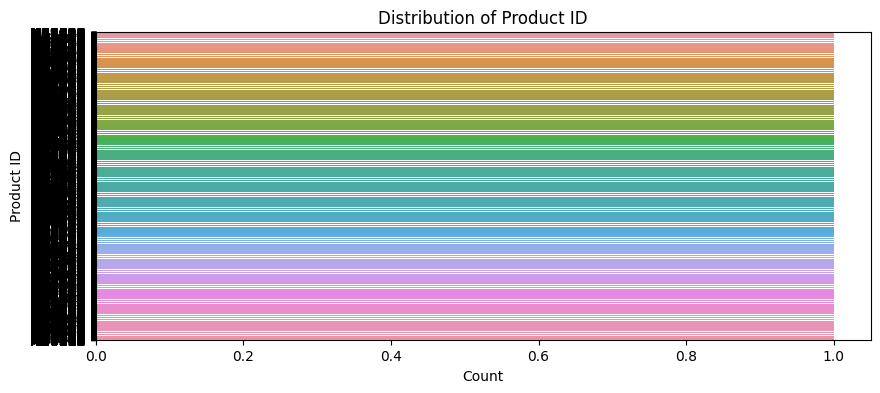

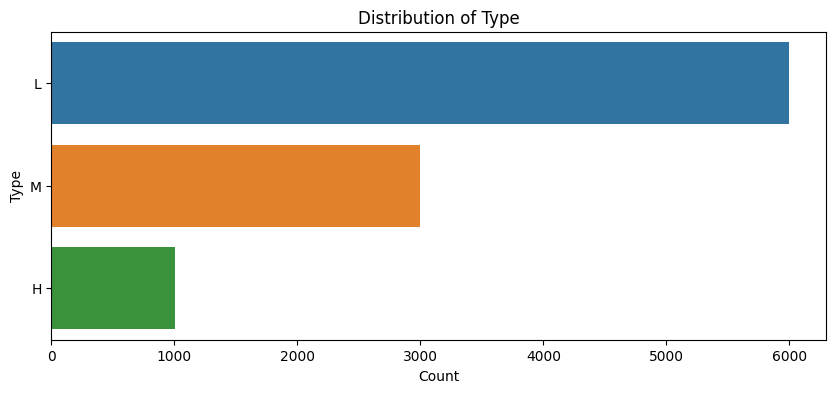

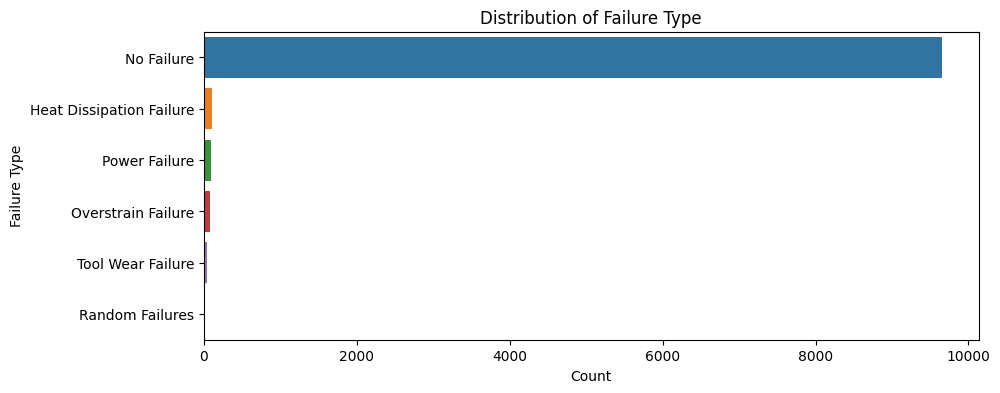

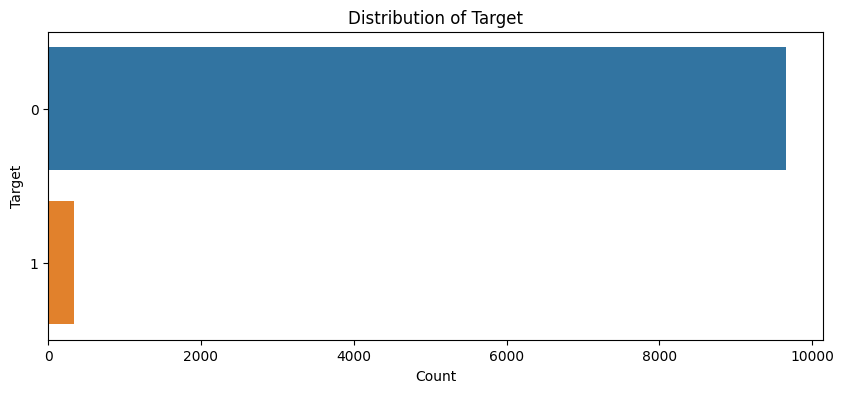

In [43]:
# Check the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

Skewed Features:
Rotational speed [rpm]    1.993171
dtype: float64


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


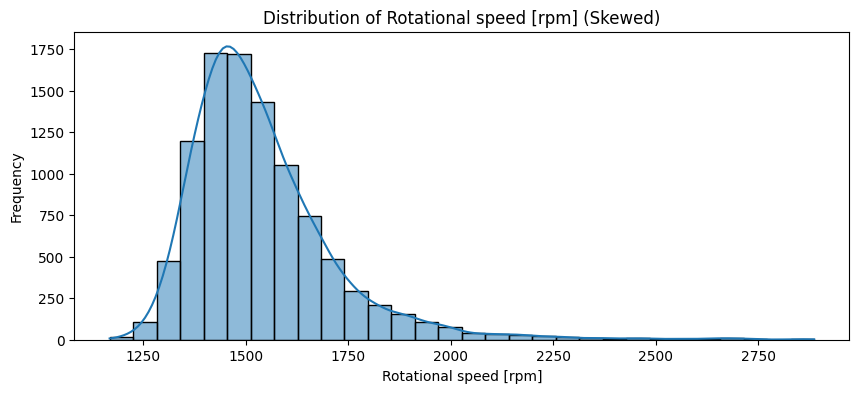

In [44]:
# get the skew distribution of continuous features
skewed_features = df[continuous_features].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewed Features:")
print(skewed_features[skewed_features > 0.5])  # Display features with skewness greater than 0.5
# Plot skewed features
for feature in skewed_features[skewed_features > 0.5].index:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} (Skewed)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Skewed Features After Transformation:
Rotational speed [rpm]    1.309708
dtype: float64


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


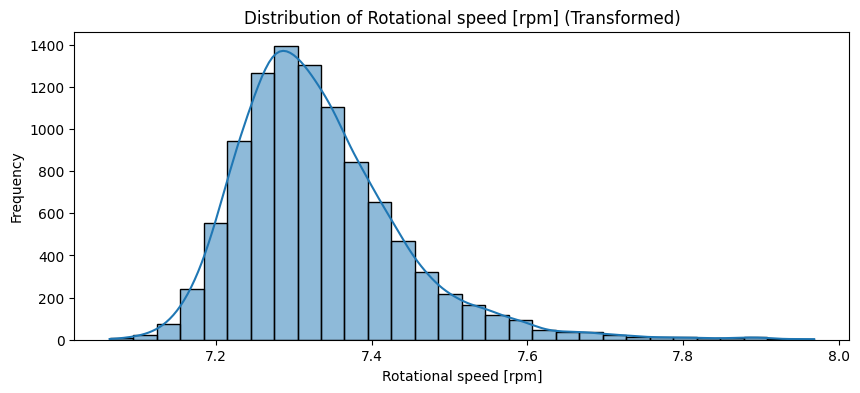

In [45]:
# transform skewed features using log transformation
for feature in skewed_features[skewed_features > 0.5].index:
    df[feature] = np.log1p(df[feature])  # log1p handles zero values correctly
# Recheck the skewness after transformation
skewed_features_after = df[continuous_features].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewed Features After Transformation:")
print(skewed_features_after[skewed_features_after > 0.5])  # Display features with skewness greater than 0.5 after transformation
# Plot the transformed skewed features
for feature in skewed_features_after[skewed_features_after > 0.5].index:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} (Transformed)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

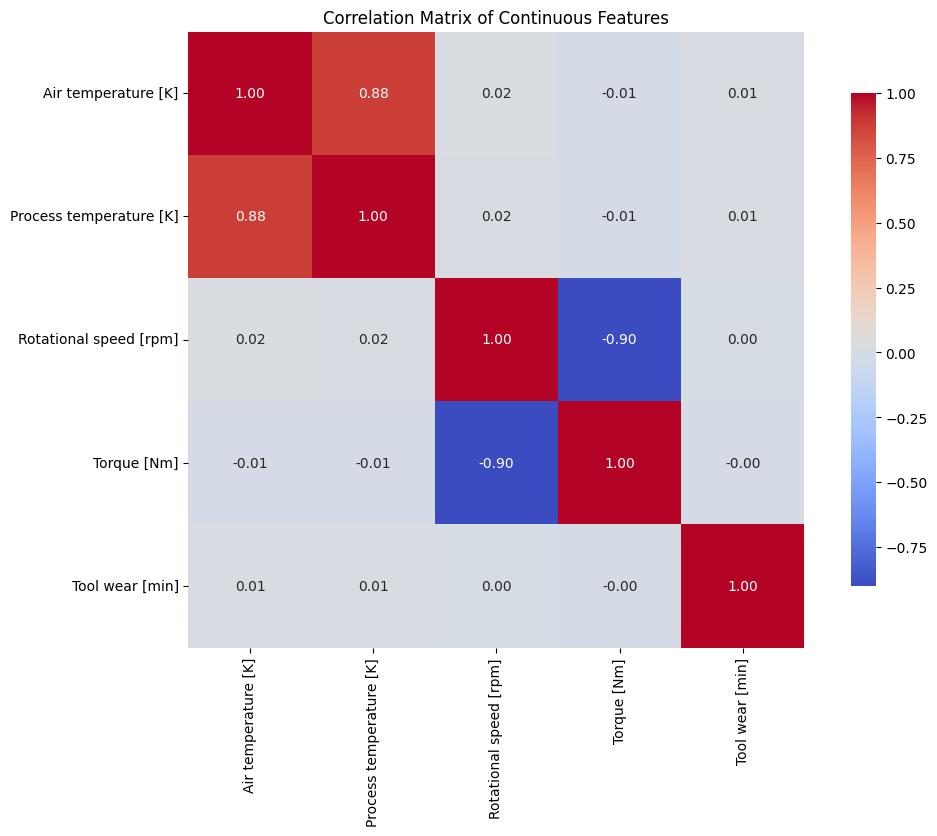

In [46]:
# check the correlation between continuous features
correlation_matrix = df[continuous_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Continuous Features')
plt.show()  

In [49]:
from scipy.stats import chi2_contingency

for feature in categorical_features:
    if feature != 'Failure Type':
        contingency = pd.crosstab(df[feature], df['Failure Type'])
        chi2, p, dof, ex = chi2_contingency(contingency)
        print(f"Chi-square for {feature}: p-value = {p:.4f}")
        if p < 0.05:
            print(f"  -> {feature} is dependent on Failure Type")
        else:
            print(f"  -> {feature} is independent of Failure Type")

Chi-square for Product ID: p-value = 0.4929
  -> Product ID is independent of Failure Type
Chi-square for Type: p-value = 0.0000
  -> Type is dependent on Failure Type
Chi-square for Target: p-value = 0.0000
  -> Target is dependent on Failure Type


In [50]:
from scipy.stats import f_oneway, kruskal

for feature in continuous_features:
    groups = [df[df['Failure Type'] == cat][feature] for cat in df['Failure Type'].unique()]
    if all(len(g) > 1 for g in groups):  # Ensure enough samples
        stat, p = f_oneway(*groups)
        print(f"ANOVA for {feature}: p-value = {p:.4f}")
        if p < 0.05:
            print(f"  -> Significant difference in {feature} across Failure Types")
        else:
            print(f"  -> No significant difference")

ANOVA for Air temperature [K]: p-value = 0.0000
  -> Significant difference in Air temperature [K] across Failure Types
ANOVA for Process temperature [K]: p-value = 0.0000
  -> Significant difference in Process temperature [K] across Failure Types
ANOVA for Rotational speed [rpm]: p-value = 0.0000
  -> Significant difference in Rotational speed [rpm] across Failure Types
ANOVA for Torque [Nm]: p-value = 0.0000
  -> Significant difference in Torque [Nm] across Failure Types
ANOVA for Tool wear [min]: p-value = 0.0000
  -> Significant difference in Tool wear [min] across Failure Types


In [51]:
# Encode the target variable numerically
df_corr = df.copy()
df_corr['Failure Type Encoded'] = df_corr['Failure Type'].astype('category').cat.codes

# Calculate correlation of continuous features with the encoded target
correlations = df_corr[continuous_features + ['Failure Type Encoded']].corr()
target_corr = correlations['Failure Type Encoded'].drop('Failure Type Encoded').abs().sort_values(ascending=False)

print("Correlation of features with Failure Type:")
print(target_corr)

# Optionally, select features with correlation above a threshold (e.g., 0.1)
selected_features = target_corr[target_corr > 0.1].index.tolist()
print("\nSelected features based on correlation threshold (0.1):")
print(selected_features)

Correlation of features with Failure Type:
Tool wear [min]            0.111619
Rotational speed [rpm]     0.058806
Torque [Nm]                0.031737
Air temperature [K]        0.025327
Process temperature [K]    0.004600
Name: Failure Type Encoded, dtype: float64

Selected features based on correlation threshold (0.1):
['Tool wear [min]']
